<a href="https://colab.research.google.com/github/jacy-sys/Financial-inclusion-in-Africa/blob/main/Financial%20inclusion%20in%20Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Financial Inclusion in Africa

A machine learning pipeline for predicting financial inclusion.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission


## Step 1: Import Libraries 🛠️

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 📌 Import necessary libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# To download files
from google.colab import files

# Suppress warnings for better readability
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
path="/content/drive/MyDrive/Zindi Financial inclusion Challenge/"

## Step 2: Load the Dataset 📥

In [ ]:
# 📥 Load datasets
train = pd.read_csv(path+'Train.csv')  # Training dataset
test = pd.read_csv(path+'Test.csv')  # Test dataset (no labels)
ss = pd.read_csv(path+'SampleSubmission.csv')  # Sample submission format
variables = pd.read_csv(path+'VariableDefinitions.csv')  # Data dictionary

# Display first few rows to understand structure
print("🔹 Training Data Preview:")
display(train.head())

print("🔹 Variable Definitions Preview:")
display(variables.head())

🔹 Training Data Preview:


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


🔹 Variable Definitions Preview:


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


 Understanding the dataset:
We can get more information about the features presented by using the info() method from pandas.

In [ ]:
#show some information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [ ]:
# Identify the target variable as the column present in train but not in test
target_variable = list(set(train.columns) - set(test.columns))

print("Target variable:")
print(target_variable)


Target variable:
['bank_account']


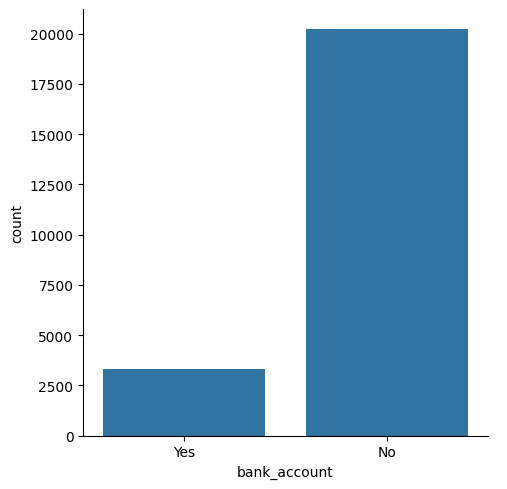

In [ ]:
# Explore Target distribution
sns.catplot(x="bank_account", kind="count", data=train)

In [ ]:
# 📊 Check dataset shapes
print(f"✅ Train dataset: {train.shape[0]} rows, {train.shape[1]} columns")
print(f"✅ Test dataset: {test.shape[0]} rows, {test.shape[1]} columns")

✅ Train dataset: 23524 rows, 13 columns
✅ Test dataset: 10086 rows, 12 columns


## Step 3: Data preprocessing

In this step we are going to inspect the data, identify any issue and fix the data to make sure it mets all the quality standards



In [ ]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [ ]:
# Check column names in each dataset
print("Training dataset columns:")
print(train.columns)

# Check data types of variables in each dataset
print("Training dataset data types:")
print(train.dtypes)


Training dataset columns:
Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')
Training dataset data types:
country                   object
year                       int64
uniqueid                  object
bank_account               int64
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [ ]:
# Check for missing values
print('missing values:', train.isnull().sum())
print('missing values:', test.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64
missing values: country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing value in our dataset.



In [ ]:
# Check number of duplicate rows in the training dataset
num_duplicates = train.duplicated().sum()
print(f"Number of duplicate rows in training dataset: {num_duplicates}")

# Remove duplicate rows
train = train.drop_duplicates()

# Confirm removal
num_duplicates_after = train.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")

# Check number of duplicate rows in the test dataset
num_duplicates = test.duplicated().sum()
print(f"Number of duplicate rows in test dataset: {num_duplicates}")

# Remove duplicate rows
test = test.drop_duplicates()

# Confirm removal
num_duplicates_after = test.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")


Number of duplicate rows in training dataset: 0
Number of duplicate rows after removal: 0
Number of duplicate rows in test dataset: 0
Number of duplicate rows after removal: 0


There are no duplicates in our dataset

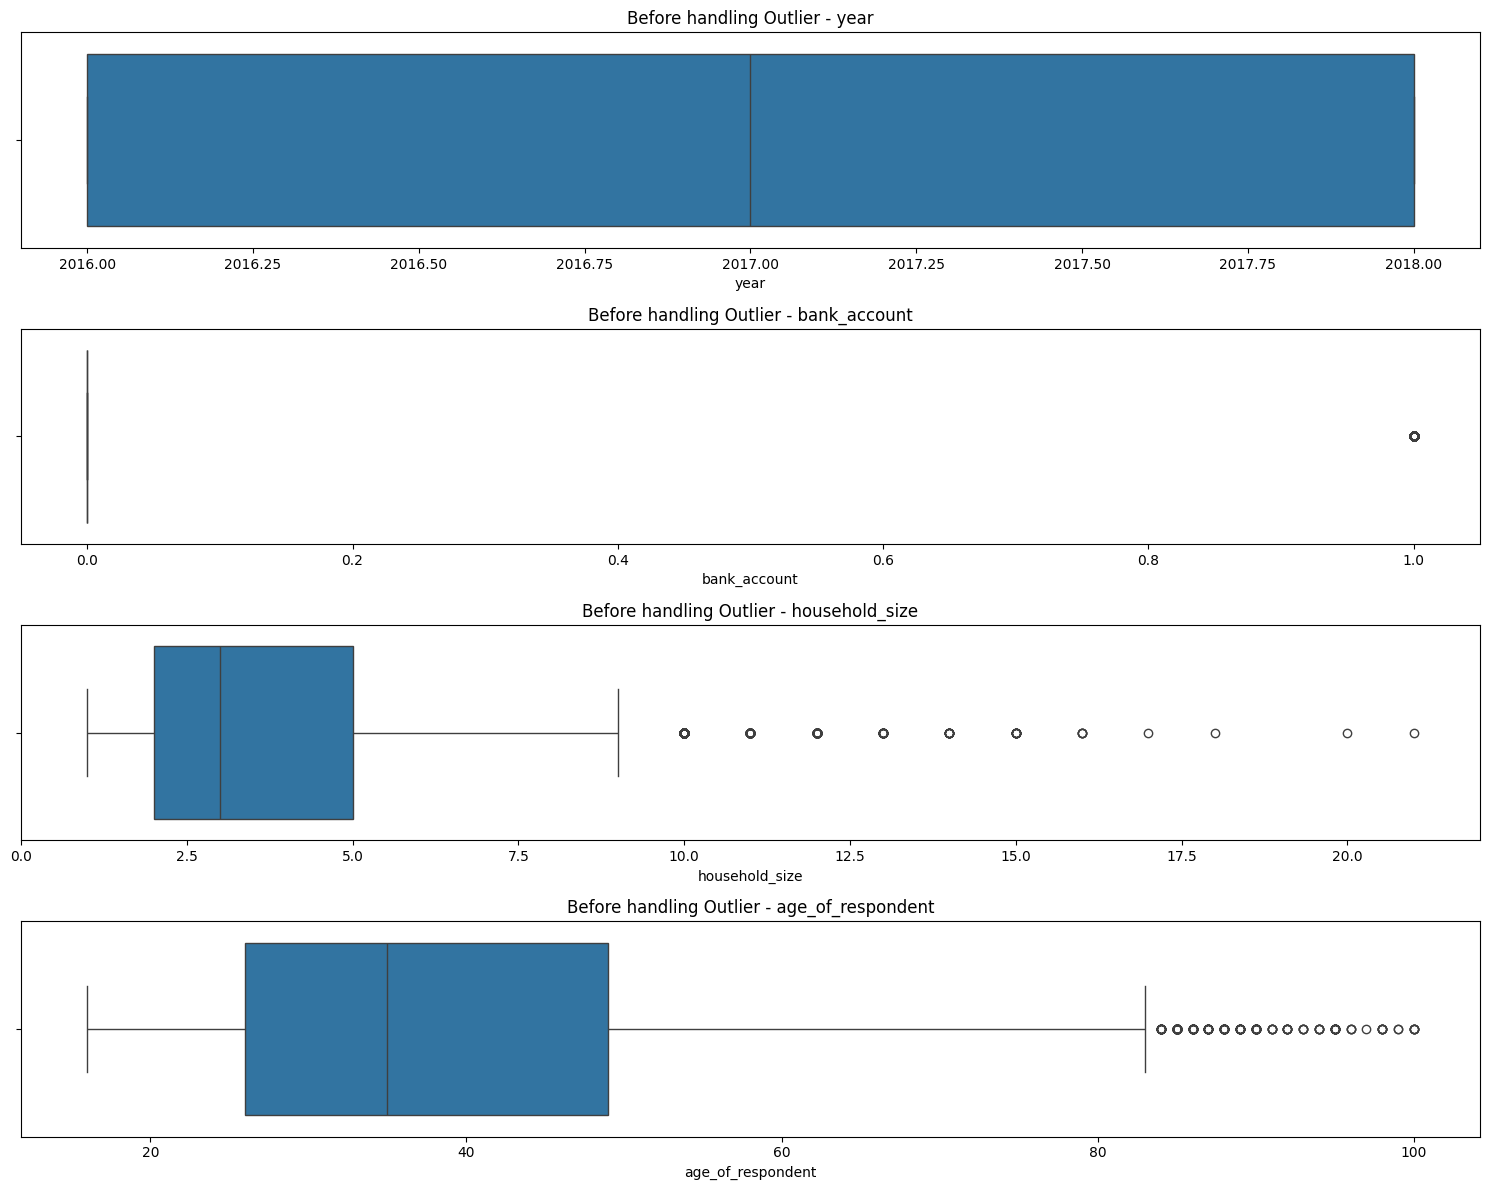

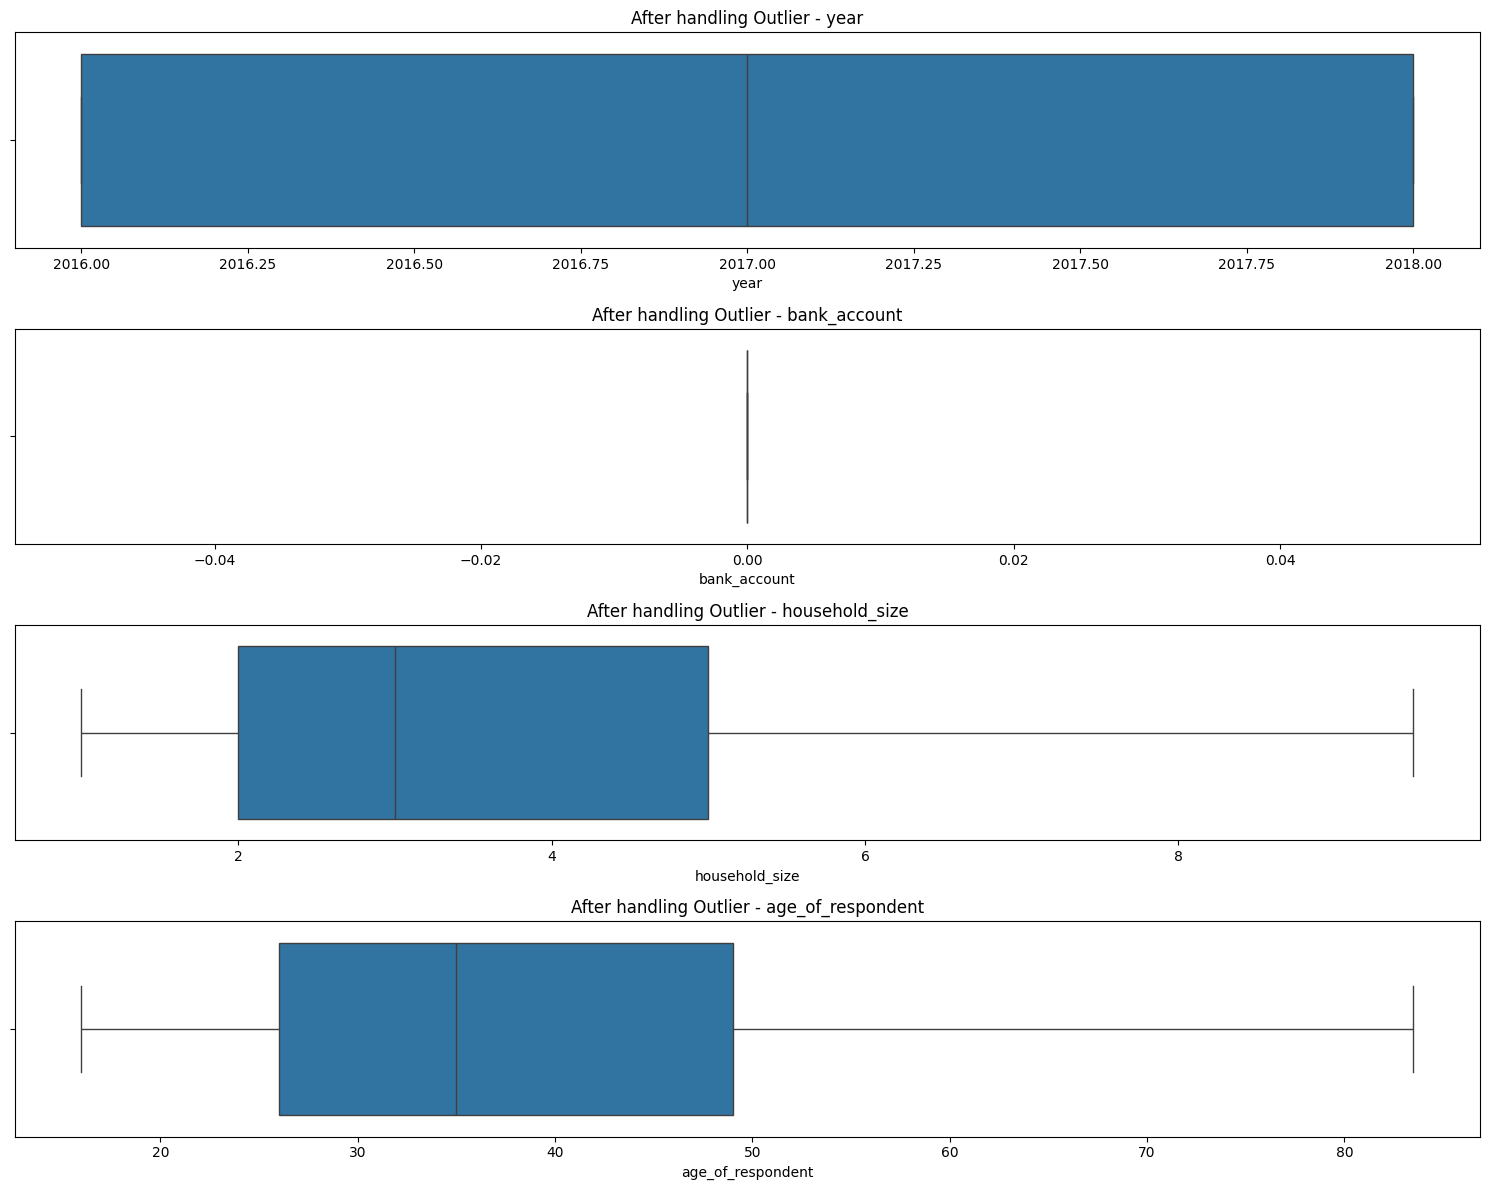

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to visualize outliers with boxplots
def plot_outliers(df, columns, title):
    plt.figure(figsize=(15, len(columns)*3))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f'{title} - {col}')
    plt.tight_layout()
    plt.show()

# Visualize outliers before fixing
plot_outliers(train, numerical_cols, 'Before handling Outlier')

# Function to cap/floor outliers using IQR method
def fix_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier fixing
train = fix_outliers(train, numerical_cols)

# Visualize outliers after fixing
plot_outliers(train, numerical_cols, 'After handling Outlier')


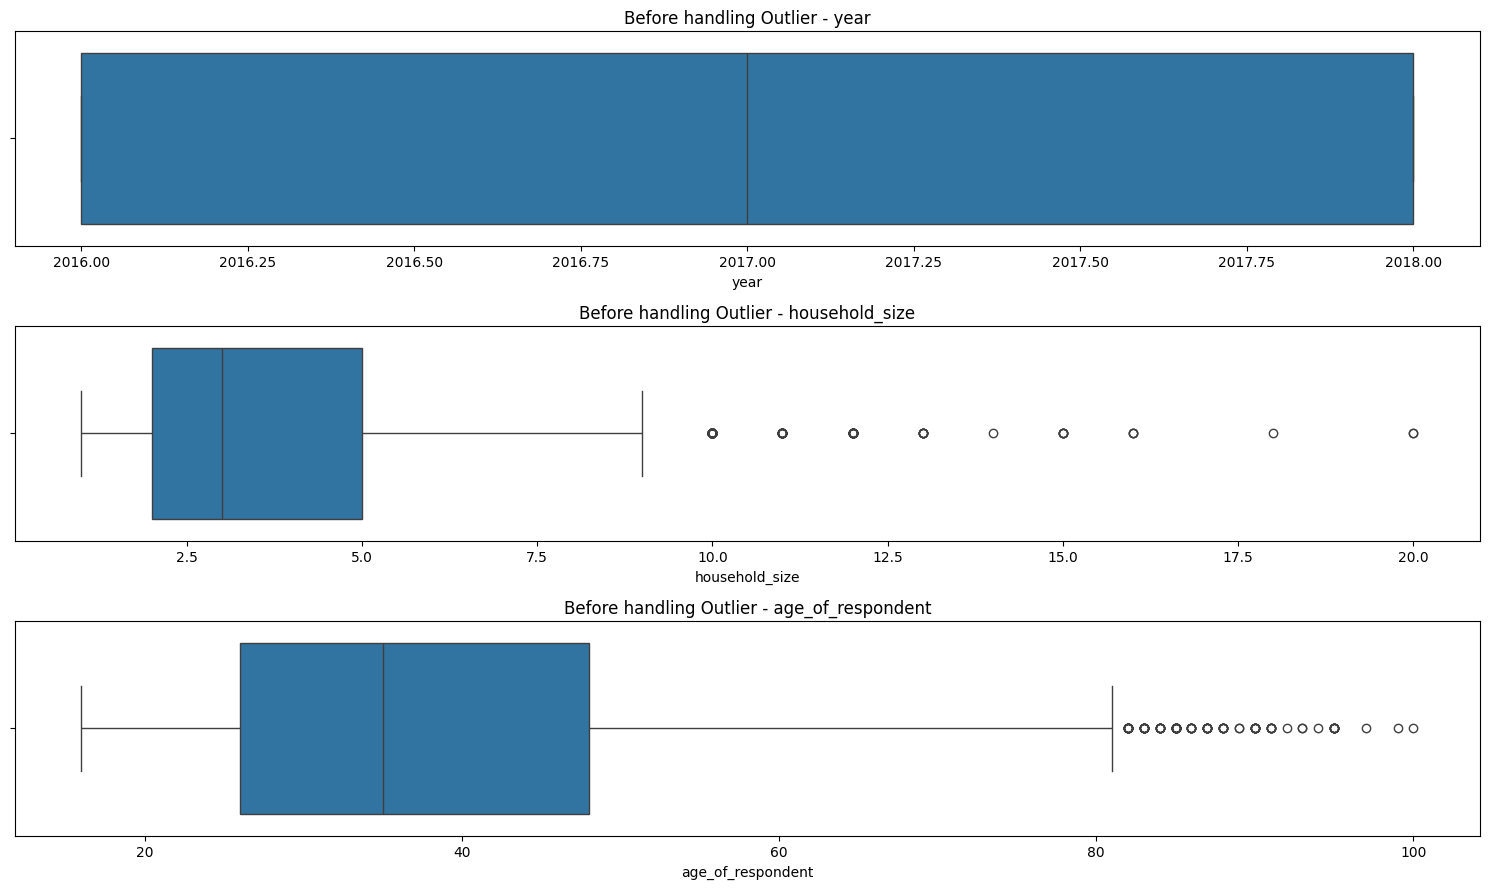

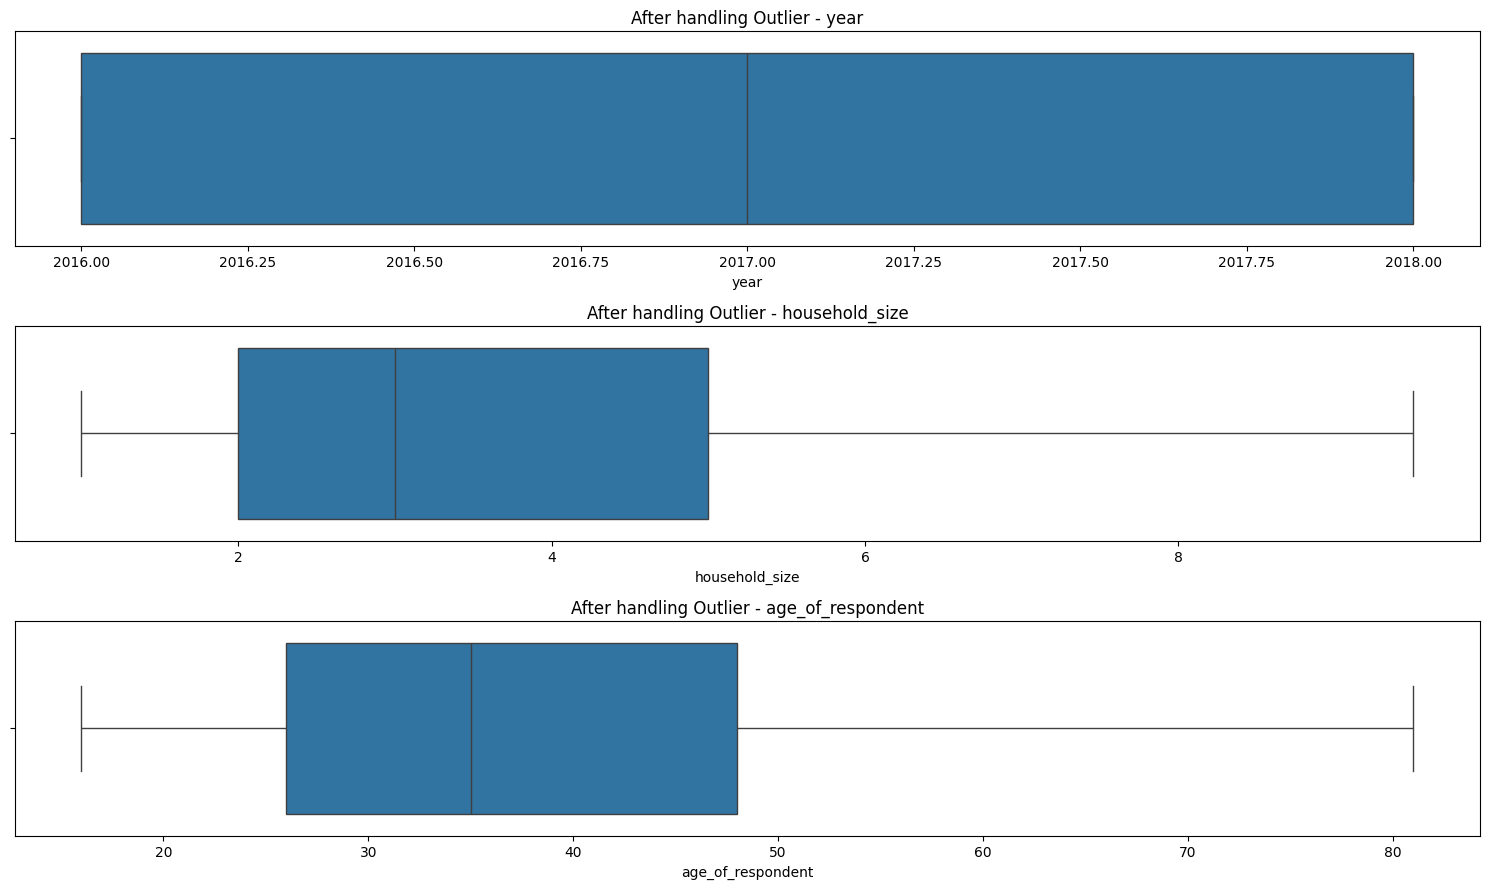

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to visualize outliers with boxplots
def plot_outliers(df, columns, title):
    plt.figure(figsize=(15, len(columns)*3))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f'{title} - {col}')
    plt.tight_layout()
    plt.show()

# Visualize outliers before fixing
plot_outliers(test, numerical_cols, 'Before handling Outlier')

# Function to cap/floor outliers using IQR method
def fix_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier fixing
test = fix_outliers(test, numerical_cols)

# Visualize outliers after fixing
plot_outliers(test, numerical_cols, 'After handling Outlier')


Outliers were detected using IQR in the 'household_size' and 'age_of_respondent' colunms and they were handled by replacing them using the upper bound and the lower bound.

> Add blockquote



In [ ]:

# Check the shape of the training dataset after outlier treatment
print("Shape of training dataset after handling outliers:")
print(train.shape)

# Optionally, check the first few rows to confirm changes
display(train.head())

# Check the shape of the testing dataset after outlier treatment
print("Shape of testining dataset after handling outliers:")
print(test.shape)

# Optionally, check the first few rows to confirm changes
display(test.head())


Shape of training dataset after handling outliers:
(23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,0,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Shape of testining dataset after handling outliers:
(10086, 12)


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3.0,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7.0,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3.0,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6.0,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3.0,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [ ]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [ ]:
# preprocess the train data
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [ ]:
# the first train row
print(processed_train[:1])
# the first test row
print(processed_test[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]
[[1.         1.         1.         0.23529412 0.21538462 1.
  0.         1.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]]


In [ ]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


###4. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [ ]:
import sklearn.model_selection

In [ ]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier( n_estimators=100,random_state=42,max_depth=None,min_samples_split=2,min_samples_leaf=1)

# Fit the model using the processed training data
rf_model.fit(X_Train, y_Train)  # X_Train is your processed feature set


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on training data
y_pred_train = rf_model.predict(X_Train)

# Display first 10 predictions
print("First 10 predictions on training data:")
print(y_pred_train[:10])

# Count how many of each class were predicted
import numpy as np
unique, counts = np.unique(y_pred_train, return_counts=True)
print("\nPrediction distribution:")
print(dict(zip(unique, counts)))


First 10 predictions on training data:
[0 0 1 0 0 0 0 0 0 0]

Prediction distribution:
{np.int64(0): np.int64(18479), np.int64(1): np.int64(2692)}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_Train, y_pred_train)
precision = precision_score(y_Train, y_pred_train, average='binary')  # 'macro' if multi-class
recall = recall_score(y_Train, y_pred_train, average='binary')


print("✅ Random Forest Performance on Training Data:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")


✅ Random Forest Performance on Training Data:
Accuracy : 0.9793
Precision: 0.9721
Recall   : 0.8779


###5. Making the first submission
First, we make predictions on the test data set.

In [ ]:
# Get predictions for the test data
processed_test_preds = rf_model.predict(processed_test)

# Assign predictions to the column
test['bank_account'] = processed_test_preds

# Display first 10 predictions
print("First 10 predicted values for test data:")
display(test[['bank_account']].head(10))

# Optional: check distribution of predictions
print("\nPrediction distribution in test data:")
print(test['bank_account'].value_counts())


First 10 predicted values for test data:


,bank_account
0,1
1,1
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0



Prediction distribution in test data:
bank_account
0    8943
1    1143
Name: count, dtype: int64


Then  create a submission file.


In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [ ]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
3074,uniqueid_9209 x Rwanda,0
6518,uniqueid_6793 x Tanzania,0
9229,uniqueid_2146 x Uganda,0
5727,uniqueid_11862 x Rwanda,0
2079,uniqueid_8148 x Kenya,1


Save results in the CSV file.


In [ ]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>